In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim

# Load the data
data = pd.read_csv('house prices.csv')

# Extract features and target variable
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Drop rows with NaN values
X = X.dropna()
y = y[X.index]  # Match indices to keep corresponding target values

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert numpy array to PyTorch tensor
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)

# Define the neural network model
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = MLPModel(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.5)

# Training the model
num_epochs = 200
best_val_loss = float('inf')
early_stop_count = 0
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validate and check for early stopping
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_count = 0
        else:
            early_stop_count += 1

    model.train()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

    if early_stop_count >= 50:
        print("Early stopping.")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = mean_squared_error(y_test, predictions.numpy())
    mae = mean_absolute_error(y_test, predictions.numpy())

print(f'Mean Squared Error on Test Set: {mse:.4f}')
print(f'Mean Absolute Error on Test Set: {mae:.4f}')


Epoch [10/200], Loss: 32458778624.0000, Validation Loss: 34529968128.0000
Epoch [20/200], Loss: 10226961408.0000, Validation Loss: 9412911104.0000
Epoch [30/200], Loss: 5251362816.0000, Validation Loss: 4740666880.0000
Epoch [40/200], Loss: 2234503424.0000, Validation Loss: 3162433792.0000
Epoch [50/200], Loss: 1965916032.0000, Validation Loss: 3070462464.0000
Epoch [60/200], Loss: 1337215104.0000, Validation Loss: 2218140416.0000
Epoch [70/200], Loss: 1079460480.0000, Validation Loss: 2043969280.0000
Epoch [80/200], Loss: 903994496.0000, Validation Loss: 1865821568.0000
Epoch [90/200], Loss: 761353920.0000, Validation Loss: 1603522816.0000
Epoch [100/200], Loss: 658343616.0000, Validation Loss: 1499668096.0000
Epoch [110/200], Loss: 579702912.0000, Validation Loss: 1415655040.0000
Epoch [120/200], Loss: 517389408.0000, Validation Loss: 1340997888.0000
Epoch [130/200], Loss: 467458528.0000, Validation Loss: 1288267136.0000
Epoch [140/200], Loss: 426117856.0000, Validation Loss: 1225757

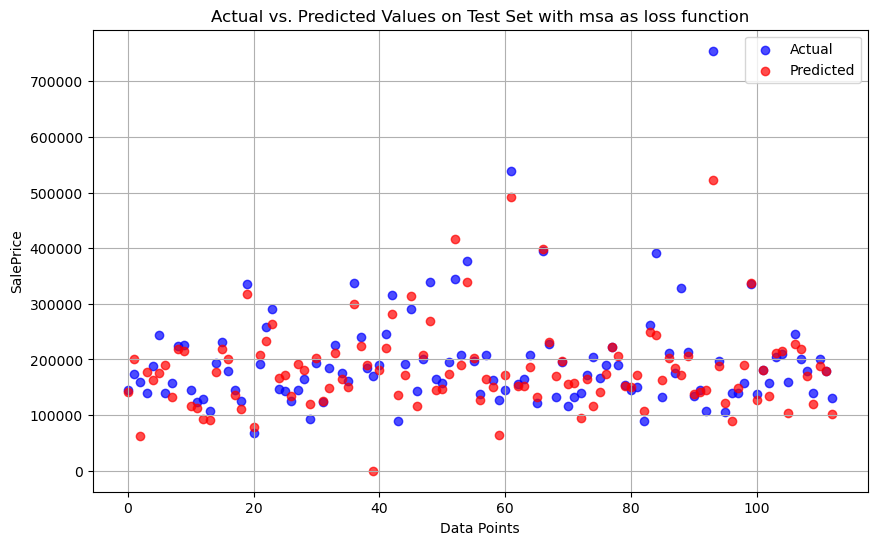

In [70]:
import matplotlib.pyplot as plt

# Convert predictions to a NumPy array
predictions_array = predictions.numpy()


# Plot actual SalePrice values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.7)

# Plot predicted SalePrice values
plt.scatter(range(len(y_test)), predictions_array, color='red', label='Predicted', alpha=0.7)

plt.title('Actual vs. Predicted Values on Test Set with msa as loss function')
plt.xlabel('Data Points')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()


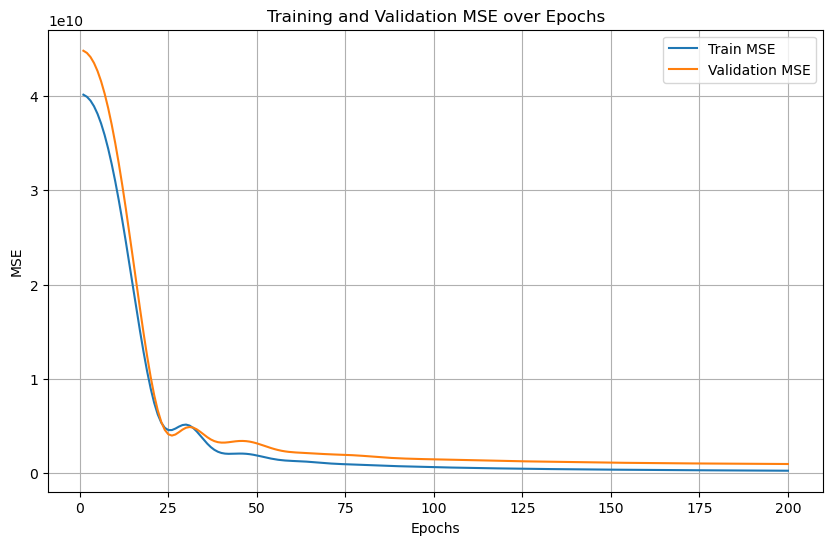

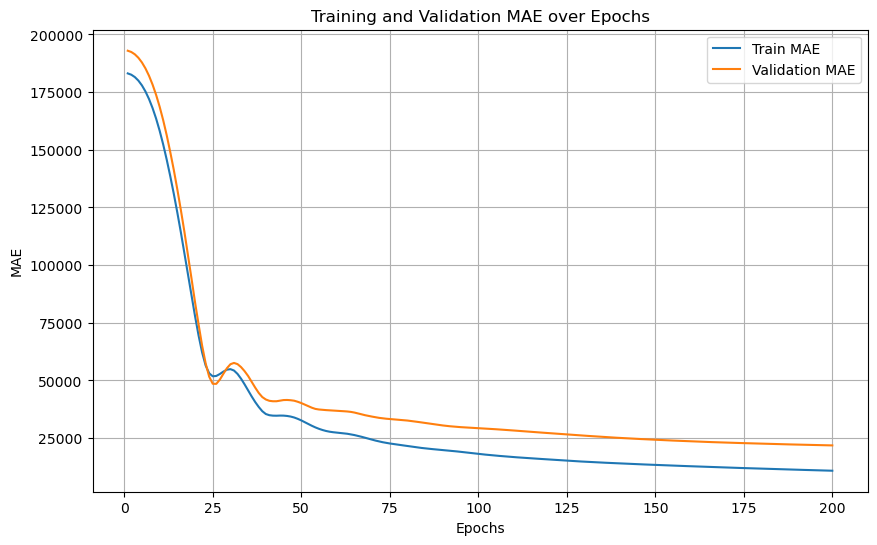

Test Mean Squared Error: 1646391480.1544
Test Mean Absolute Error: 25865.0486


In [71]:


# Initialize the model
input_size = X_train.shape[1]
model = MLPModel(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.5)

# Training the model
num_epochs = 200
best_val_loss = float('inf')
early_stop_count = 0

# Lists to store metrics for visualization
train_mse_list, val_mse_list, test_mse_list = [], [], []
train_mae_list, val_mae_list, test_mae_list = [], [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validate and check for early stopping
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_count = 0
        else:
            early_stop_count += 1

    model.train()

    # Calculate metrics for training, validation, and test data
    train_outputs = model(X_train_tensor)
    train_mse = mean_squared_error(y_train, train_outputs.detach().numpy())
    train_mae = mean_absolute_error(y_train, train_outputs.detach().numpy())
    
    val_mse = val_loss.item()
    val_mae = mean_absolute_error(y_val, val_outputs.detach().numpy())

    test_outputs = model(X_test_tensor)
    test_mse = mean_squared_error(y_test, test_outputs.detach().numpy())
    test_mae = mean_absolute_error(y_test, test_outputs.detach().numpy())

    # Append metrics to the lists
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)
    test_mse_list.append(test_mse)

    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)
    test_mae_list.append(test_mae)

    if early_stop_count >= 50:
        print("Early stopping.")
        break

# Visualize MSE over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_mse_list, label='Train MSE')
plt.plot(range(1, num_epochs + 1), val_mse_list, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.title('Training and Validation MSE over Epochs')
plt.show()

# Visualize MAE over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_mae_list, label='Train MAE')
plt.plot(range(1, num_epochs + 1), val_mae_list, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.title('Training and Validation MAE over Epochs')
plt.show()

# Print Test MSE and MAE
print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test Mean Absolute Error: {test_mae:.4f}')


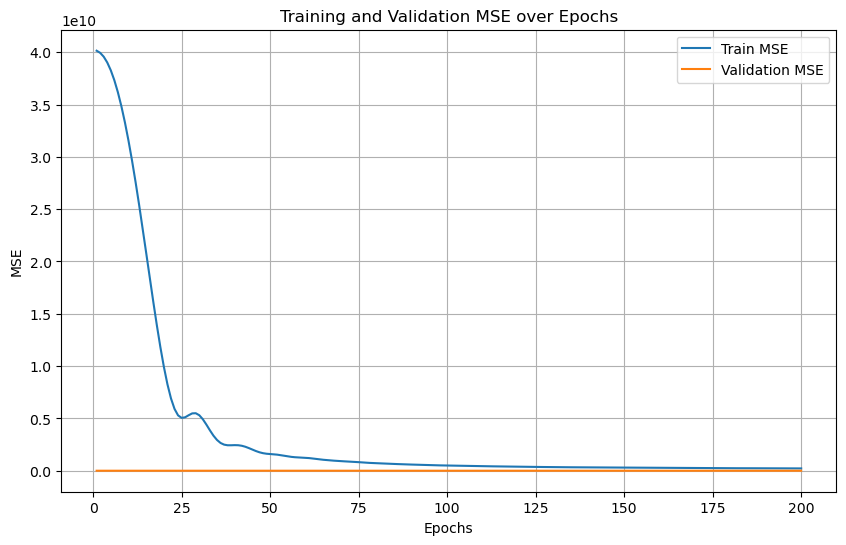

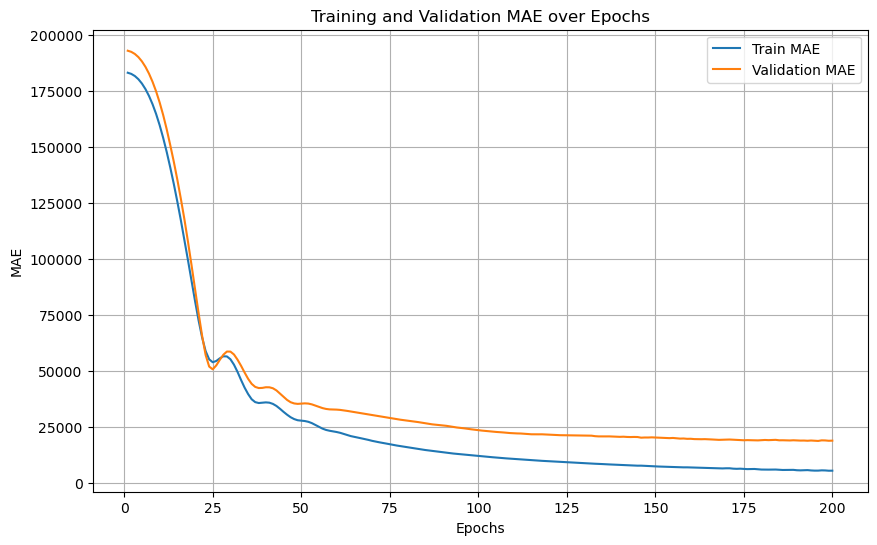

Test Mean Squared Error: 1582696058.7729
Test Mean Absolute Error: 26371.7650


In [72]:


# Initialize the model
input_size = X_train.shape[1]
model = MLPModel(input_size)

# Define the loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.5)

# Training the model
num_epochs = 200
best_val_loss = float('inf')
early_stop_count = 0

# Lists to store metrics for visualization
train_mse_list, val_mse_list, test_mse_list = [], [], []
train_mae_list, val_mae_list, test_mae_list = [], [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validate and check for early stopping
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_count = 0
        else:
            early_stop_count += 1

    model.train()

    # Calculate metrics for training, validation, and test data
    train_outputs = model(X_train_tensor)
    train_mse = mean_squared_error(y_train, train_outputs.detach().numpy())
    train_mae = mean_absolute_error(y_train, train_outputs.detach().numpy())
    
    val_mse = val_loss.item()
    val_mae = mean_absolute_error(y_val, val_outputs.detach().numpy())

    test_outputs = model(X_test_tensor)
    test_mse = mean_squared_error(y_test, test_outputs.detach().numpy())
    test_mae = mean_absolute_error(y_test, test_outputs.detach().numpy())

    # Append metrics to the lists
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)
    test_mse_list.append(test_mse)

    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)
    test_mae_list.append(test_mae)

    if early_stop_count >= 50:
        print("Early stopping.")
        break

# Visualize MSE over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_mse_list, label='Train MSE')
plt.plot(range(1, num_epochs + 1), val_mse_list, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.title('Training and Validation MSE over Epochs')
plt.show()

# Visualize MAE over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_mae_list, label='Train MAE')
plt.plot(range(1, num_epochs + 1), val_mae_list, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.title('Training and Validation MAE over Epochs')
plt.show()

# Print Test MSE and MAE
print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test Mean Absolute Error: {test_mae:.4f}')


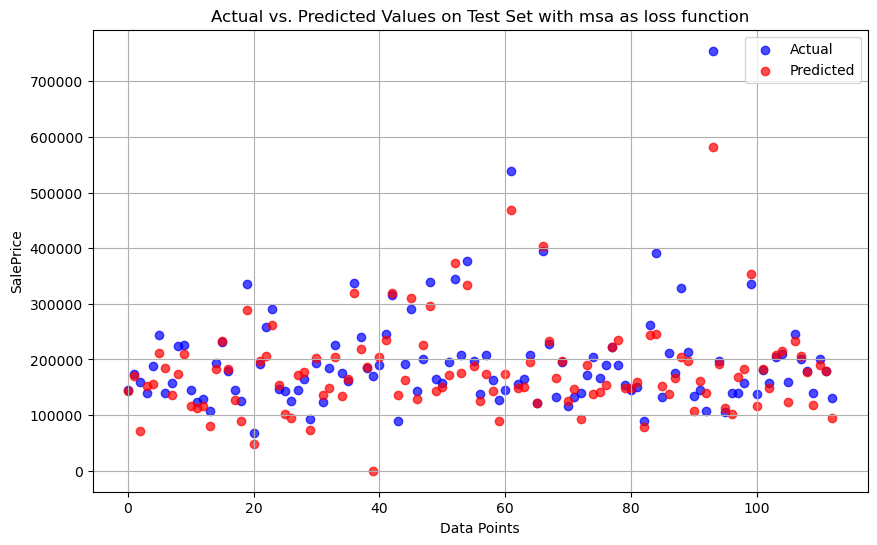

In [73]:
import matplotlib.pyplot as plt

# Convert predictions to a NumPy array

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
predictions_array = predictions.numpy()


# Plot actual SalePrice values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.7)

# Plot predicted SalePrice values
plt.scatter(range(len(y_test)), predictions_array, color='red', label='Predicted', alpha=0.7)

plt.title('Actual vs. Predicted Values on Test Set with msa as loss function')
plt.xlabel('Data Points')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()
